# Cryptanalyse de RSA

## Question 16


In [1]:
reset()

In [2]:
'''
fonction qui genere des cles RSA 

Input : k, delta
Output: N,e,d
'''
def gen_keys(k,delta):
    
    p=next_prime(randint(2^(k-1),2^k))   #on génère p et q
    q=next_prime(randint(2^(k-1),2^k))
    
    N=p*q                                #on calucule N, Phi(N) et N^delta
    phiN=(p-1)*(q-1)
    Nd=int(N^delta)
    for d in range(Nd,1,-1):             #on part de N^delta pour que d soit le plus proche de cette valeur
        gc,e,_=xgcd(d,phiN)                  #on cherche un element premier avec phi(N)
        if gc==1:
            return N,e%phiN,d

In [3]:
%time gen_keys(40,1)

CPU times: user 903 µs, sys: 972 µs, total: 1.88 ms
Wall time: 995 µs


(972800520994537078079629, 516188474517404869519357, 972800520994537078079629)

## Question 17, 18, 19
Voir rapport.

In [4]:
def sum1(m):
    return ((m+2)*(m+1))/2

In [5]:
def sum2(m,t):
    s=0
    for i in range(1,t+1):
        s=s+m-(m//t)*i+1
    return s

In [6]:
'''
fonction permettant de calculer le cardinal de M, soit le nombre de monomes possibles
'''
def card_M(m,t):
    return sum1(m)+sum2(m,t)

In [7]:
card_M(2,1)

7

## Question 20
Voir rapport.

## Question 21

In [8]:
#on definit l'anneau des polynomes Z[x,y,u]
PRxyu.<x,y,u>=PolynomialRing(ZZ)

#on va ici representer les polynomes P(x,y) par les polynomes de la forme P(a_,b_) pour ne pas reutiliser
#les memes variables
PRxy.<a_,b_>=PolynomialRing(ZZ)

#ici, on va representer Z[x] par Z[c_]
PRx.<c_>=PolynomialRing(ZZ)

#de meme, on va representer Z[y] par Z[d_]
PRy.<d_>=PolynomialRing(ZZ)

In [9]:
'''
fonction permettant de substituer chaque occurence de x*y par u-1
'''
def change_xy(P):
    P_bis=0                # on définit un nouveau polynome
    for coeff,m in list(P):    #on recupere les couples (coeff, monomes) de la liste du polynome
        v=m                    #on définit v comme le monome
        cpt=0                  #on definit un compteur pour compter le nombre de fois que l'on retire x*y
        while v/(x*y) in PRxyu:    #tant que l'on peut retirer x*y de v
            v=v/(x*y)              #on retire x*y à v
            cpt=cpt+1              #on incrémente le compteur
        P_bis=P_bis + coeff*v*((u-1)^cpt) #on ajoute le produit du monome, du multiple 
    return PRxyu(P_bis)

### Test

In [10]:
#on prend un exemple
P=PRxyu(y*u^2 + 2*u*x*y + x^2*y)
#on doit trouver : y*u^2 + 2*u*(u-1) + x*(u-1) = y*u^2 + x*u + 2*u^2 - x - 2*u

P=change_xy(P)
print(P)
print(P.parent())

y*u^2 + x*u + 2*u^2 - x - 2*u
Multivariate Polynomial Ring in x, y, u over Integer Ring


## Mise en place de l'algorithme pour creer la base

In [11]:
#algo:

    #definir les valeurs 
        #definit N,e,d,A,X,Y,U

    #creer les fonctions :
        # on cree f_bar 
        # on cree g_bar, h_bar
        # on cree une fonction permettant de generer la famille de g
        # on cree une fonction permettant de generer la famille de h

    #creer les equations :
        # on genere la famille des polynomes de g
            # on place les polynomes dans une liste
        # on genère la famille des polynomes de h
            # on substitue des occuences de x*y par u-1 
            # on place les polynomes dans une liste 
        # on fusionne les deux listes 

    #creer la matrice :
        # on va generer la liste des monomes possibles 
        # on cree un dictionnaire permettant de lier les monomes et leur position 
        # on creer la matrice de taille (nbr_equation x nbr_monomes)
            # pour chaque equations
                # pour chaque couple (coeff,monomes) 
                    # on récupere la position du monome grace au dictionnaire
                    # on place le son coeff à la position donné

In [12]:
#on definit les fonctions 

def f_bar(A,u,x):
    return (u+A*x)

def g_bar(A,e,m,i,k,u,x):
    return x^i * (f_bar(A,u,x)^k) * e^(m-k)

def h_bar(A,e,m,t,j,k,u,x,y):
    return y^j * (f_bar(A,u,x)^k) * e^(m-k)

'''
fonction peremttant de generer la famille des polynomes de g
'''
def g_bar_familly(A,e,m,u,x):
    L=[]
    for k in range(0,m+1):
        for i in range(0,m-k+1):
            L.append(g_bar(A,e,m,i,k,u,x))
    return L

'''
fonction peremttant de generer la famille des polynomes de h
'''
def h_bar_familly(A,e,m,t,u,x,y):
    L=[]
    for j in range(1,t+1):
        for k in range((m//t)*j,m+1):
            L.append(h_bar(A,e,m,t,j,k,u,x,y))
    return L

### Test

In [13]:
#test des fonctions 
#definition des valeurs
U=var('U')
X=var('X')
Y=var('Y')
e=var('e')
A=var('A')
m=2
t=1
G=g_bar_familly(A,e,m,u,x)
H=h_bar_familly(A,e,m,t,u,x,y)
print("exemple avec m=",m," et t=",t)
print('\nfamille de g',G)
print('\nfamille de h',H)

exemple avec m= 2  et t= 1

famille de g [e^2, e^2*x, e^2*x^2, (A*x + u)*e, (A*x + u)*e*x, (A*x + u)^2]

famille de h [(A*x + u)^2*y]


In [14]:
'''
fonction permettant de generer tous les monomes possibles
Input : m,t
Output : Liste les monomes possibles
'''
def find_monom_list(m,t):
    M1=[]
    M2=[]
    for k in range(0,m+1):
        for i in range(0,k+1):
            M1.append(x^(k-i)*u^i)
    for j in range(1,t+1):
        for k in range((m//t)*j,m+1):
            M2.append(y^j*u^k)
    return M1+M2

In [15]:
#exemple avec m=2, t=1
find_monom_list(2,1)

[1, x, u, x^2, x*u, u^2, y*u^2]

In [16]:
'''
fonction permettant d'appliquer change_xy() sur tout les elements d'une liste 
I : H la liste des polynomes à modifier
O : nH la liste des polynomes modifiés
'''
def change_xy_list(H):
    nH=[]
    for p in H:
        nH.append(change_xy(p))
    return nH

In [17]:
'''
fonction permettant de creer un dictionnaire qui a pour but d'associer chaque monome à une coordonnée.
elle crée aussi le dictionnaire inverse pour retrouver les monomes en fonction d'un indice 
I: M la liste des monomes possibles
O: les deux dinctionnaires
'''
def create_dico(M):
    dico={}
    idico={}
    cpt=0
    for i in M:
        dico[i]=cpt
        idico[cpt]=i
        cpt=cpt+1
    return dico,idico


'''
fonction permettant d'evaluer en x,y,u les polynomes de la liste list_poly
'''
def evaluate(x,y,u,list_poly):
    newlist=[]
    for P in list_poly:
        newlist.append(P(x,y,u))
    return newlist

In [18]:
#creation de la matrice :
'''
fonction permettant de creer la base du reseau
'''
def create_basis_matrix(A,e,m,t,U,X,Y,monom_list,dico):
    G=g_bar_familly(A,e,m,u*U,x*X)           #on genere la famille des polynomes g
    H=h_bar_familly(A,e,m,t,u,x,y)           #on genere la famille des polynomes h
    H=change_xy_list(H)                      #on modifie les occurences de h
    H=evaluate(x*X,y*Y,u*U,H)                #on evalue en x*X, y*Y, u*U
    list_of_equations = G+H                  #on fusionne la famille de g avec la famille de h 
                                                     
    L=len(list_of_equations)                 #on definit le nombre de lignes de la matrice par 
                                                                       #le nombre de polynomes
    C=len(monom_list)                        #on definit le nombre de colonnes par le nombre de monomes possibles
    
    M=matrix(ZZ,L,C)                            #on cree la matrice
    
    for i in range(len(list_of_equations)):
        eq=list_of_equations[i]
        for a,monom in list(eq):
            M[i,dico[monom]]=a
    return M

### Test

In [19]:
#definition des valeurs avant execution
#exemple :
delta=0.2
N=522002869
e=502260317
print("N=",N)
print("e=",e)

N= 522002869
e= 502260317


In [20]:
#on calculs les valeurs necessaires
A=N+1
e_to_m=e^m
X=int(e^delta)+1
Y=int(e^(0.5))+1
U=1+X*Y
m=2
t=1

In [21]:
monom_list=find_monom_list(m,t)     #on genere la liste des monomes possibles
dico,idico=create_dico(monom_list)  #on cree les dictionnaires

%time L=create_basis_matrix(A,e,m,t,U,X,Y,monom_list,dico) #on cree la base du reseau

CPU times: user 7.62 ms, sys: 744 µs, total: 8.36 ms
Wall time: 7.77 ms


In [22]:
print(L)

[        252265426032940489                          0                          0                          0                          0                          0                          0]
[                         0       13874598431811726895                          0                          0                          0                          0                          0]
[                         0                          0                          0      763102913749644979225                          0                          0                          0]
[                         0       14419972982861038450            619116704613537                          0                          0                          0                          0]
[                         0                          0                          0      793098514057357114750          34051418753744535                          0                          0]
[                         0                  

In [23]:
BasisLLL=L.LLL()

## Question 22

In [24]:
'''
fonction permettant de substituer chaque occurence de u par 1+x*y
'''
def change_u(P):
    P_bis=PRxyu(0)           # on définit un nouveau polynome
    for coeff,monom in P:    #on recupere les couples (coeff, monomes) de la liste du polynome
        v=monom                   #on définit v comme le monome
        cpt=0                     #on definit un compteur pour compter le nombre de fois que l'on retire x*y
        while v/u in PRxyu:       #tant que l'on peut retirer x*y de v
            v=v/u                     #on retire u à v
            cpt=cpt+1                 #on incrémente le compteur
        P_bis=P_bis + coeff*v*((1+x*y)^cpt) #on ajoute le produit du monome, du multiple 
    return PRxy(P_bis(a_,b_,0)) #on convertit le polynome 

In [25]:
change_u(2*u)

2*a_*b_ + 2

## Question 23
Voir rapport.

## Question 24

In [26]:
#on va recuperer le polynome de la matrice L, avec iP les indices des lignes de la matrice
def get_poly_from_matrix(L,idico, iP):
    poly=0
    for j in range(0,L.ncols()):
        poly=poly+L[iP,j]*idico[j]
    return poly

In [27]:
#on va maintenant creer une fonction qui permet de "nettoyer" les polynomes
# c'est à dire retirer les bornes X,Y et U puis changer u par 1+xy

#on commence par creer un dictionnaire qui va lier nos monomes avec les bornes
dico_monom_bound={}
dico_monom_bound[x]=X
dico_monom_bound[y]=Y
dico_monom_bound[u]=U

'''
pour retirer X,Y, et U
on va d'abord determiner quel monome est present, ensuite, identifier sa puissance
'''
def clean_poly(P,dico_monom_bound):
    new_poly=0
    for coeff,monom in list(P): # on parcours les couples (coeff,produit des monomes)
        new_coeff=coeff
        for i,p in list(factor(monom)):# on recupere le couple (monome, puissance)
            new_coeff=new_coeff/((dico_monom_bound[i])^p)
        new_poly+=new_coeff*monom
    return change_u(new_poly) #on retourne le polynomes dont on a substitué chaque occurence de u par 1+x*y


'''
cette fonction permet de calculer la norme d'un vecteur sous fome de polynome
'''
def norme_P(P):
    s=0
    for (coeff,monom) in P:
        s+=coeff^2
    return s.isqrt()
    
'''
cette fonction permet de verifier si le polynome p respecte la condition
omega est le nombre de monomes possibles 
'''
def is_good_poly(P,e_to_m,omega,norme_P):
    return int(norme_P)<=int(e_to_m/sqrt(omega))



In [28]:
#fontion pour gagner en efficacité
'''
fonction permettant, en une fois 
    - de recuperer le polynome
    - retirer les bornes dans les coefficients
    - et changer les occurences de u par 1+ux
    - calculer la norme

Autrement dit, on mix des deux fonction : get_poly_from_matrix() & clean_poly()
tout en caculant la norme.

I:  - L la base.LLL sous forme de matrice
    - idico le dictionnaire inverse (id => monom)
    - iP l'indice du vecteur dans la matrice
    - dico_monom_bound le dictionnaire des bornes (x => X)

O:  - polynome dans Z[a_,b_]
    - norme arrondie 
'''
def get_poly_from_matrix_and_clean(L,idico, iP, dico_monom_bound):
    new_poly=0
    comp_norm=0
    for j in range(0,L.ncols()):
        
        #on recuperes les valeurs
        coeff=L[iP,j]
        monom=idico[j]
        
        #on retire les brones
        new_coeff=coeff
        for i,p in list(factor(monom)):# on recupere le couple (monome, puissance)
            new_coeff=new_coeff/((dico_monom_bound[i])^p)
            
            
        #on change les occurences de u par 1+xy   
        v=monom                
        cpt=0                 
        while v/u in PRxyu: 
            v=v/u                
            cpt=cpt+1         
        new_poly=new_poly + new_coeff*v*((1+x*y)^cpt) 
        
        #calcul de la norme
        comp_norm=comp_norm+(new_coeff^2)
    return PRxy(new_poly(a_,b_,0)),ZZ(comp_norm).isqrt()

### Test

In [29]:
#test

iP=0 #indice du polynome

#on recupere un polynome
P1=get_poly_from_matrix(BasisLLL,idico,iP)
print("P1 brute :",P1)
clean_P1=PRxy(clean_poly(P1,dico_monom_bound))
print("P1 nettoyé :",clean_P1)
print("varification :",is_good_poly(clean_P1,e_to_m,len(monom_list),norme_P(clean_P1)))

#test de la fonction plus efficace
P2=get_poly_from_matrix_and_clean(BasisLLL,idico, iP, dico_monom_bound)
print("\nP1 nettoyé et norme :",P2)

P1 brute : 16699435319427025*x^2 + 16247805830141490*x*u + 3952097619535521*u^2
P1 nettoyé : 2601*a_^2*b_^2 + 239656038*a_^2*b_ + 5520474485761*a_^2 + 5202*a_*b_ + 239656038*a_ + 2601
varification : True

P1 nettoyé et norme : (2601*a_^2*b_^2 + 239656038*a_^2*b_ + 5520474485761*a_^2 + 5202*a_*b_ + 239656038*a_ + 2601, 5520474490962)


In [30]:
#on va maintenant creer un fonction permettant de determiner si les deux polynomes ont un resultant différent de 0 
#en fonction de deux indices

'''
fonction permettant de determiner si le resultant des deux polynomes possedes au moins deux racines, 
et donc est différent de 0
'''
def is_2_good_poly(BasisLLL,idico,clean_P1,clean_P2,dico_monom_bound):

    Sol=clean_P1.resultant(clean_P2,b_) #on calcule le resultant
    Sol=PRx(Sol(c_,0))                  #on change l'anneau des polynomes (Z[a_,b_] => Z[c_])
    
    if Sol!=0 : #si le resultant est différent de 0 
        
        racines=Sol.roots(ring=QQ)
        if len(racines)>1: # si il y a plus de 2 racines 
            for sqr,deg in racines:
                if sqr not in ZZ: # si les racines ne sont pas dans ZZ 
                    return False,[clean_P1,clean_P2,0,0]
            return True,[clean_P1,clean_P2,Sol,racines]
    return False,[clean_P1,clean_P2,0,0]

In [31]:
#on teste cette cette fonction :
P1=get_poly_from_matrix(BasisLLL,idico,0)
clean_P1=clean_poly(P1,dico_monom_bound)
bool_P1=is_good_poly(clean_P1,e_to_m,BasisLLL.ncols(),norme_P(clean_P1))
        
P2=get_poly_from_matrix(BasisLLL,idico,1)
clean_P2=clean_poly(P2,dico_monom_bound)
bool_P2=is_good_poly(clean_P2,e_to_m,BasisLLL.ncols(),norme_P(clean_P2))
if bool_P1 and bool_P2:
    bool_val,list_data=is_2_good_poly(BasisLLL,idico,clean_P1,clean_P2,dico_monom_bound)

In [32]:
'''
cette fonction va permettre de choisir deux polynomes dans la base qui respectent toutes les conditions, 
pour ensuite renvoyer la racine x_0:
'''
def get_2_good_poly(BasisLLL,idico,e_to_m,dico_monom_bound):
    rows=BasisLLL.nrows()
    
    ######### affichage ##############
    nchar=min(80,rows-3)
    string="|"+" "*nchar+"|"
    print(string)
    pourc=0
    pourc_prc=0
    print(' ', end='')
    ##################################
    
    
    for i in range(rows-1):
        
        # partie naive
        # on applique les pres calcul 
        #P1=get_poly_from_matrix(BasisLLL,idico,i)              #on recupere le polynome 
        #clean_P1=clean_poly(P1,dico_monom_bound)               #on nottoie le polynome
        #bool_P1=is_good_poly(clean_P1,e_to_m,BasisLLL.ncols(),norme_P(clean_P1))
        ################
        
        # partie optimisé
        clean_P1,norme=get_poly_from_matrix_and_clean(BasisLLL,idico, i, dico_monom_bound) 
        bool_P1=is_good_poly(clean_P1,e_to_m,BasisLLL.ncols(),norme)    #on verifie la condition 
        ################
        
        
        if bool_P1:
            for j in range(i+1,rows):
                
                ######### affichage ##############
                pourc=(j*nchar)/rows
                if pourc>pourc_prc:
                    print('#',end='')
                    pourc_prc+=1
                ##################################
                
                # partie naive
                # on applique les pres calcul 
                #P2=get_poly_from_matrix(BasisLLL,idico,j)
                #clean_P2=clean_poly(P2,dico_monom_bound)
                #bool_P2=is_good_poly(clean_P2,e_to_m,BasisLLL.ncols(),norme_P(clean_P2))
                ################
                
                # partie optimisé
                clean_P2,norme=get_poly_from_matrix_and_clean(BasisLLL,idico, j, dico_monom_bound)
                bool_P2=is_good_poly(clean_P2,e_to_m,BasisLLL.ncols(),norme)
                ################
                
                if bool_P2:
                    bool_val,list_data=is_2_good_poly(BasisLLL,idico,clean_P1,clean_P2,dico_monom_bound)
                    if bool_val:
                        return list_data
                    
            # d'apres plusieurs observations, on pourrait quitter directement si les couples dont la premiere 
            # valeur est le polynome correspondant au premier vecteur ne permettent pas de trouver 
            # ce que les racines.
            return [0,0,0,0]
    return [0,0,0,0] # aucun polynomes qui respectent cette condition

In [33]:
#on teste cette fonction :
P1,P2,Sol,racines=get_2_good_poly(BasisLLL,idico,e_to_m,dico_monom_bound)
print("\nP1=",P1)
print("P2=",P2)
print("resultant :",Sol)
print("racines :",racines)

|    |
 ###
P1= 2601*a_^2*b_^2 + 239656038*a_^2*b_ + 5520474485761*a_^2 + 5202*a_*b_ + 239656038*a_ + 2601
P2= a_^2*b_^3 + 1726*a_^2*b_^2 - 140620321*a_^2*b_ + 2*a_*b_^2 - 1741770306459*a_^2 - 89441818080*a_*b_ + 437848476869715*a_ + b_ - 89441819806
resultant : 140575999984022360480247713728570098289*c_^10 - 14338751998370280768985266800314150025478*c_^9 + 365638175958442159609124303408010825649689*c_^8
racines : [(51, 2), (0, 8)]


In [34]:
# on creer un fonction permettant de recuperer la racine non nul
def get_root(list_racines):
    for (root,mult) in list_racines:
        if root!=0:
            return root
    return 0

In [35]:
#test
x_0=get_root(racines)
print(x_0)

51


In [36]:
#on caste notre polynome
P1_bis=PRy(P1(x_0,d_))
print(P1_bis)

6765201*d_^2 + 623345620140*d_ + 14358766359924900


In [37]:
#on recupere y_0
[(y_0,_)]=P1_bis.roots()
print(y_0)

-46070


In [38]:
euler_phi(N)

521956800

In [39]:
#on cacule phi(N)
phiN=A+y_0
print("Phi(N)=",phiN)

Phi(N)= 521956800


Algo à executer:

    on initialise nos valeurs :
        on genre nos cles N, e, d
        on calcul A
        les bornes X, Y, U
        on définit m et t
        
    on creer la base du reseau :
        on genere la liste des monomes possibles 
        on creer les dictionnaires
        on creer la matrice 
        on applique LLL sur la matrice
    
    on retrouve d :
        on recupere 2 polynomes qui respectent la condition 
        on y retire les bornes puis on substitue u par 1+xy
        on calcule le resultant des deux polynomes par rapport à y 
        si il est non nul on cherche la racine x_0
        on en deduit y_0
        on trouve d

In [40]:
def compute_p(N,phiN):
    a=1
    b=(N+1-phiN)
    c=N
    delta=b^2-4*a*c
    return (-b+sqrt(delta))/2*a

In [41]:
compute_p(N,phiN)

-20101

In [42]:
factor(N)

20101 * 25969

## Attaque

In [64]:
def RSA_attack(N,e,m,t,delta,verb):
    
    #on calcule les valeurs 
    print("\n calcul des valeurs...")
    A=N+1
    X=int(e^delta)+1
    Y=int(e^(0.5))+1
    U=1+X*Y
    e_to_m=e^m
    
    #on genere les monomes possibles et les dictionnaires
    if verb:
        print("\n generation des monomes possibles..")
    monom_list=find_monom_list(m,t)     #on genere la liste des monomes possibles
    if verb:
        print("\n generation des dictionnaires..")
    dico,idico=create_dico(monom_list)  #on cree les dictionnaire

    #on genere la matrice
    if verb:
        print("\n generation de la matrice...")
    L=create_basis_matrix(A,e,m,t,U,X,Y,monom_list,dico) #on creer la base
    if verb:
        print("    taile de la matrice :",L.nrows(),'x',L.ncols())
        print("\n application de LLL sur la matrice...")
    BasisLLL=L.LLL()                                    #on genere la LLL de la base
    if verb:
        print("    LLL ok")
    
    #on genere le dictionnaire les bornes 
    dico_monom_bound={}
    dico_monom_bound[x]=X
    dico_monom_bound[y]=Y
    dico_monom_bound[u]=U
    
    #on parcourt les vecteurs de la matrice pour les convertir en polynomes
    if verb:
        print("\n recherche des polynomes...")
    P1,P2,Sol,racines=get_2_good_poly(BasisLLL,idico,e_to_m,dico_monom_bound)
    
    if verb:
        print("\n\nP1=",P1)
        print("\nP2=",P2)
        print("\nresultant :",Sol)
        print("\nracines :",racines)
    
    #si on ne trouve aucun bon polynomes
    if P1==0:
        print("Aucun bon polynomes")
        return 1
    
    x_0=get_root(racines)
    print("\nx_0=",x_0)
    
    #on caste notre polynome
    P1_bis=PRy(P1(x_0,d_))
    
    #on recupere y_0
    [(y_0,_)]=P1_bis.roots()
    print("\ny_0=",y_0)
    
    #on cacule phi(N)
    phiN=A+y_0
    print("\nPhi(N)=",phiN)
    
    return gcd(compute_p(N,phiN),N)
    



## Tests de l'attaque

### Test sur un produit de premiers de 64 bits

In [44]:
delta=0.22
m=2
t=int(m*(1-2*delta))

N,e,d=gen_keys(64,delta)

print("N=",N)
print("e=",e)
print("delta=",delta)

N= 103358196683433644391610981972799727617
e= 47737902976546933377593381118507434629
delta= 0.220000000000000


In [45]:
RSA_attack(N,e,m,t,delta)


 calcul des valeurs...

 generation des monomes possibles..

 generation des dictionnaires..

 generation de la matrice...
    taile de la matrice : 7 x 7

 application de LLL sur la matrice...
    LLL ok

 recherche des polynomes...
|    |
 ##

P1= 11359222007281801*a_^2*b_^2 + 463607241266686296594766054141475254*a_^2*b_ + 4730334392996414335676184952843573784697158933352398929*a_^2 + 22718444014563602*a_*b_ + 463607241266686296594766054141475254*a_ + 11359222007281801

P2= 5*a_^2*b_^3 + 84695235703413553335*a_^2*b_^2 - 205130992023123999070890526060518521275*a_^2*b_ + 10*a_*b_^2 + 498816709932191057132381974992181622330751384849603591863*a_^2 - 13789179329562749770542637376611992875497893759*a_*b_ - 11187060949050232308183184494097817259691880385509034339371018501*a_ + 5*b_ - 13789179329562749770542637461307228578911447094

resultant : 9420635547776381573746254645427844618011625619637285830196337105013125224497786019756181335208770797770417958065024406455618235548826790106063641604

9337527321087895091

In [96]:
d

281487805

In [97]:
Pour 
delta=0.22
N= 191079605712525268029715945676619758401
e= 131761611501543917117550125855149440439
d= 264160059

x_0 = (e*d-1)/phi(n) = 182155259
X = e^delta = 243418486

SyntaxError: cannot assign to operator (<ipython-input-97-2206e582c9ac>, line 7)

In [50]:
182155259 < 243418486

True

### Test sur un produit de premiers de 128 bits

In [47]:
delta=0.21
N,e,d=gen_keys(128,delta)
m=2
t=int(m*(1-2*delta))

print("N=",N)
print("\ne=",e)
print("\ndelta=",delta)

N= 80007155205535303242029658738752135706922974032605779217778552778742675432843

e= 42822797296061905525281587998786575006754674086996721652217529630642174459787

delta= 0.210000000000000


In [48]:
%time d=RSA_attack(N,e,m,t)

print("\nN=",d,' * ',N/d)


 calcul des valeurs...

 generation des monomes possibles..

 generation des dictionnaires..

 generation de la matrice...
    taile de la matrice : 7 x 7

 application de LLL sur la matrice...
    LLL ok

 recherche des polynomes...
|    |
 ##

P1= 57069821881350253236897026105625*a_^2*b_^2 + 64714488955876006223915654506233695758420224470083799239624276666376850*a_^2*b_ + 18345795302844528977288902033491484704242486021562739391573507705756330468633230742328038817277752009520673401*a_^2 + 114139643762700506473794052211250*a_*b_ + 64714488955876006223915654506233695758420224470083799239624276666376850*a_ + 57069821881350253236897026105625

P2= -136*a_^2*b_^3 - 80510887330156673562048884259713770565502*a_^2*b_^2 + 6065653653677186709156950369448061121242659947820791611237009194613206411588973*a_^2*b_ - 272*a_*b_^2 - 456980719187701686439215454738634276714714730664519779240013280113523182376079722899537574286367394516282856248942272*a_^2 - 58803160291797098261505677092129001412222584650

### Test sur un produit de premiers de 512 bits

In [161]:
delta=0.2
N,e,d=gen_keys(512,delta)
m=2
t=int(m*(1-2*delta))

print("N=",N)
print("\ne=",e)
print("\ndelta=",delta)

N= 87031354886458821260523948428747747400308082092698871244516257166024749972076347972816986849945746099902165406443623344703445749742388429298728235844207134569357663166247804412860601616209696436622770136585055881334448905622578731984306098004964850011325297107071065529613675210019632346925836349459100674351

e= 38396886975277040178463336908163835885935355647512980124155533943202238258802089021200345560289772273435735982698045438364477880446353646570538341045528595499901108310556139022403022066689473180091208172391248915185695689135332704415935056690466194710305755682408716487247592054971039096022390001948109181109

delta= 0.200000000000000


In [162]:
delta=0.9
%time d=RSA_attack(N,e,m,t,delta)

print("\nN=",d,' * ',N/d)


 calcul des valeurs...

 generation des monomes possibles..

 generation des dictionnaires..

 generation de la matrice...
    taile de la matrice : 7 x 7

 application de LLL sur la matrice...
    LLL ok

 recherche des polynomes...
|    |
 #[(0, 2)]
##[(17082656956435056939845355589888462630665154160197750273071892, 1), (0, 4)]


P1= -655920848393666962578770224441104707313156280762082702371599804024051512617988177676767994409815247840062500249464528974691387331551539295577490199598964112901289651350346906013353126760221641120590878404086732201775009728725333639686077425681415928323306850514201303005787237772261406136923182517857580516251829263543983437006518614062520162307795547858164658005288228*a_*b_ - 126530839819702596250521770171424705518448135172385516325636177898450829378509280677621678347037239508620221288603564159338780827251601518644112022822720010778786269508865855218852689556002468991884988291034873883640754503833008875581703454929291990906636697863662610113240110783255

### Test sur un produit de premiers de 1024 bits

In [158]:
delta=0.20
N,e,d=gen_keys(1024,delta)
m=3
t=int(m*(1-2*delta))

print("N=",N)
print("\ne=",e)
print("\ndelta=",delta)

N= 20703924551929705438515746090726586723665208952202673688963300553000120381646766954484154714531099314713003838803524180387654303875985349867535093634378765517007016176245345330979990815293902634781644934754874795453525481179464697056720645635078448761615199728106481125267156921661159296079072561886504951750942569412702923402874353391304719305901575270412958925591480264672492304348451022472831346812100087866239707210180825453372454528970919846235609344645430357774389851823158952515894835062912941021728790887762244497446844824863834176897772201922127654482467464203422086005820219535817334110075329383934766140571

e= 741777750623638015899663170215997287819794874629381099666985027722876192559585111775855179137971518191504026863169244588401564093328866212391570115120096165280781176023942600064644492063528422926281871518021837670376265107273010899468004171174254535801324004590833036730868459792790534251714874487122044471266924665806870716452334226949561277207451991379669628933452120043250

In [159]:

%time d=RSA_attack(N,e,m,t,delta)

print("\nN=",d,' * ',N/d)


 calcul des valeurs...

 generation des monomes possibles..

 generation des dictionnaires..

 generation de la matrice...
    taile de la matrice : 11 x 11

 application de LLL sur la matrice...
    LLL ok

 recherche des polynomes...
|        |
 ###[(656797757917939754094592848843706530488068900619118454618869600508183902661348529328434217196232136799823742881801113232666, 3), (0, 18)]


P1= -283331580831855832668971766157224026786800532803438415058658804950980966705317733703558096367267130147002821580961121231963798619796702309214911390590719727048294592702142802401138718553239466607713324995780579268195192605427432158042480203266377197757622233484779544163883677572254759437591876427869446807236909725538158053850451565284179659432842581177347586846384296*a_^3*b_^3 - 248107907257602411321672714397758963859214994684114133604592980877170866523772477977934309327155031209457383796302404555257145576308420501062248060264068061715653419127177334469651489105721362112472968233144742419117079

### Test sur un produit de premiers de 2048 bits

In [160]:
delta=0.2
N,e,d=gen_keys(2048,delta)
m=2
t=int(m*(1-2*delta))

print("N=",N)
print("\ne=",e)
print("\ndelta=",delta)

<ipython-input-52-3e336567fa15>:10: RuntimeWarning: cypari2 leaked 12879440 bytes on the PARI stack
  q=next_prime(randint(Integer(2)**(k-Integer(1)),Integer(2)**k))


KeyboardInterrupt: 

In [248]:
%time d=RSA_attack(N,e,m,t)

print("\nN=",d,' * ',N/d)


 calcul des valeurs...

 generation des monomes possibles..

 generation des dictionnaires..

 generation de la matrice...
    taile de la matrice : 7 x 7

 application de LLL sur la matrice...
    LLL ok

 recherche des polynomes...


P1= 6263425382168409487445952070755872768819737570210587965801377301908248527245513056917806452892213396604013700094055396590841294518838629812652652412978196733960557175659973827412753265560273263917614357654061250289948890419163260666933239266078634072006409811530907520943059188932036864745400732266359762531579938945502714029259316401937219721513214680330646138339243098716221591178399105040065752554735539800617241359460486498461773429840706913408823086908618569718054522217779663947974759396*a_^2*b_^2 + 6210904424823626280450148476115824535772910859833830580303490399558544414635079988535162567708536165416405432532969105533375317654679727259386764467802322930025977358464902855068570746312138073586077874111788567482157721584171592282434394920987596198189

## Autres tests :
On va ici, compter le nombre de vecteurs à partir duquel on trouve le bon polynome $P_1$.

In [281]:
for i in range(100):
    print("Test",i,"=============================================")
    delta=0.2
    N,e,d=gen_keys(512,delta)
    m=2
    t=int(m*(1-2*delta))
    RSA_attack_bis(N,e,m,t)
    print("=============================================")

Test 0 =============================================


NameError: name 'RSA_attack_bis' is not defined

On remarque que l'on optient toujours 0

On va aussi, compter le nombre de vecteurs à partir duquel on trouve le bon polynome $P_2$.

verbose 0 (3835: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 23 points.
verbose 0 (3835: plot.py, generate_plot_points) Last error message: 'Unable to compute f(11.0)'
verbose 0 (3835: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 23 points.
verbose 0 (3835: plot.py, generate_plot_points) Last error message: 'Unable to compute f(11.0)'


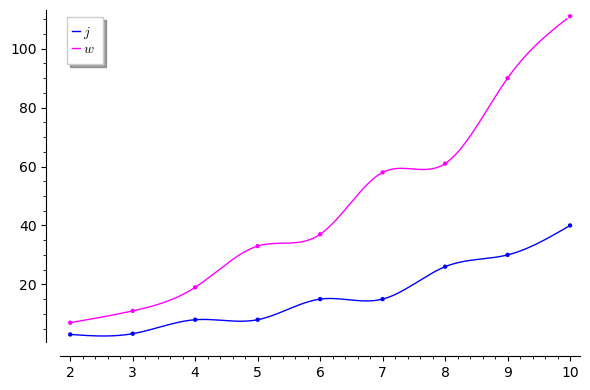

In [73]:
#points représentants les valeurs de m en abscices et omega en ordonnée
omega_list=[(m,card_M(m,int(m*(1-2*0.2)))) for m in range(2,11)]
#points représentants les valeurs de m en abscices et j en ordonnée
j_list=[(2,3),(3,3.26),(4,8),(5,8),(6,15),(7,15),(8,26),(9,30),(10,40)]
points(j_list, pointsize=10)+points(omega_list,color=(1,0,1), pointsize=10)+plot(spline(j_list), 2, 11, legend_label='$j$')+plot(spline(omega_list), 2, 11, color=(1,0,1), legend_label='$w$')

On remarque que j vaut environ 40% de w:

verbose 0 (3835: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 22 points.
verbose 0 (3835: plot.py, generate_plot_points) Last error message: 'Unable to compute f(11.0)'
verbose 0 (3835: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 23 points.
verbose 0 (3835: plot.py, generate_plot_points) Last error message: 'Unable to compute f(11.0)'


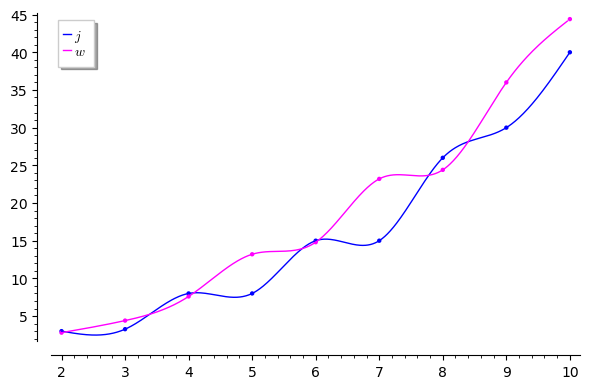

In [76]:
#points représentants les valeurs de m en abscices et 40% de omega en ordonnée
omega_list_40=[(m,0.4*card_M(m,int(m*(1-2*0.2)))) for m in range(2,11)]
points(j_list, pointsize=10)+points(omega_list_40,color=(1,0,1), pointsize=10)+plot(spline(j_list), 2, 11, legend_label='$j$')+plot(spline(omega_list_40), 2, 11, color=(1,0,1), legend_label='$w$')

On pourait donc fixer l'indice du deuxieme polynome afin de trouver preque instantanément deux polynomes dont le resultant possedes deux racines dans ZZ.

## Attaque sur le fichier RSA.sage:

In [53]:
#load("RSA.sage")


N = 121178899139602948260717755767413112257475531688938516348660656129386588712348577856440200351401183816685433722131146620400600124827599523006291077940452144157082110313841594207916561120323519349092607462252690554415837844163048957117882300058095700791695540210936674504547128932050939838698686574215733698741
e = 103602461150278043969365247823062226256469297429243494796333737300496950036959919645230971554280651938824673649187239944582165059678702599711651836206548586808411759529835936686585757801027494975786210143284411625853293737356831926946805790343485820793446067080643502834136611045778107395235444718738701494669

print("\nN=",N)
print("\ne=",e)


N= 121178899139602948260717755767413112257475531688938516348660656129386588712348577856440200351401183816685433722131146620400600124827599523006291077940452144157082110313841594207916561120323519349092607462252690554415837844163048957117882300058095700791695540210936674504547128932050939838698686574215733698741

e= 103602461150278043969365247823062226256469297429243494796333737300496950036959919645230971554280651938824673649187239944582165059678702599711651836206548586808411759529835936686585757801027494975786210143284411625853293737356831926946805790343485820793446067080643502834136611045778107395235444718738701494669


In [64]:
delta=0.275
m=8
t=int(m*(1-2*delta))
print("delta=",delta)
print("m=",m)
print("t=",t)
%time RSA_attack(N,e,m,t,delta)

delta= 0.275000000000000
m= 8
t= 3

 calcul des valeurs...

 generation des monomes possibles..

 generation des dictionnaires..

 generation de la matrice...
    taile de la matrice : 60 x 60

 application de LLL sur la matrice...
    LLL ok

 recherche des polynomes...
|                                                         |
 #

P1= -1492988067173067436186073436374977813278415124824955197621467635037584337709917321344*a_^8*b_^11 + 15449934980860849424634618785211127118134784732457876173910010483988595205063278732953934249173831847352523826020083866990033908743555422060981121585592818278896667689692430862833742056401548170929058741407324912510740732036272064322233263503*a_^8*b_^10 - 5787729607851121795102059434135555224367993294911992517144100945429720056706689492969039317128073986557578201198843888085730127019570553203111387840516430261938386617524565065184228110190006488586613035344878514816068771475532223919337492493371590373607105610968966459101075279144940434963439946738151299

9959378560703019705588025499791703899970027186030030223720791777880603558408703677902512130889791276574756731824881053866266673337074216466626768313835479

In [131]:
delta=0.2
N,e,d=gen_keys(1024,delta)
m=2
t=int(m*(1-2*delta))

print("N=",N)
print("\ne=",e)
print("\ndelta=",delta)

N= 21742129921792923819608936642112869655417066872341784750429455818139017389209153441418092388262804335430514307200354093279214735266717653359732131372218918576602073631734369923077905204055326184507286804117040720977562763473350779622122226163796795370056185308868084392492242446462227642920180825852695855923262183782971717961574429289919794023429104017121431698921378479044138258932917327802228979658426743647304636472326501911771419211284754107730558113471255596685754243298173046399767832402785997558527912099502366803925052196780315972852131995722803789608031990683655537581953853888344763262505198329805796724641

e= 927201100938185983572879830276846638796579276263493396214156284879755750519390052295011528788483415165130166531286310597557788404842737134815623073354396039511043159206951421917899156952721009328564206368608967484413206367673322424345078740304789176877053286339224936796740339051028897416473555932505487814901153407917749066010337778664772092712160269916332216361059940580512

In [136]:
delta=0.
m=7
t=int(m*(1-2*delta))
print("\ndelta=",delta)
print("m=",m)
print("t=",t)
RSA_attack(N,e,m,t,delta)


delta= 0.300000000000000
m= 7
t= 2

 calcul des valeurs...

 generation des monomes possibles..

 generation des dictionnaires..

 generation de la matrice...
    taile de la matrice : 43 x 43

 application de LLL sur la matrice...
    LLL ok

 recherche des polynomes...
|                                        |
 ########################

P1= 19112869106672773367060199465095337490295854926485691600526016385842697585586681055135681588230517373154901477760423658172128463741553794895325055616501377723416398926048573065812809217209600072758733066429757269387874417965142581306199999396422045507585839012509988247020561250373525533904568202459641415784494307899795665535013968974353465365380288841486622532762328366641351552099849430790471587952301235071522983512972705590232776740272382025311742629435626210719063727249916577839522271836290085132306362227623360712021471918349796168502392604603810585173212604745885238315542929661140067971920893782314744242772617491652642347055520218157389160427

141856909206520990774626384894576908969406328367445917798656622479836766682286002733204714206484043956244860554833702670192257932590914607159952764355598872019776248641378994658195761306910449913605027957121614927437026092174244263708257335800843047647107581894664250925111704586500111869018755332848904811159

In [66]:

for i in range(30,100):
    delta=float(i/100)
    m=7
    t=int(m*(1-2*delta))
    N=188198812920607963838697239461650439807163563379417382700763356422988859715234665485319060606504743045317388011303396716199692321205734031879550656996221305168759307650257059
    e=65537
    print("\ndelta=",delta)
    print("m=",m)
    print("t=",t)
    if RSA_attack(N,e,m,t,delta,0)!= 1:
        print("===================================================")


delta= 0.3
m= 7
t= 2

 calcul des valeurs...
|                                        |
 #######
x_0= -7

y_0= -552

Phi(N)= 188198812920607963838697239461650439807163563379417382700763356422988859715234665485319060606504743045317388011303396716199692321205734031879550656996221305168759307650256508

delta= 0.31
m= 7
t= 2

 calcul des valeurs...
|                                        |
 #######
x_0= -7

y_0= -552

Phi(N)= 188198812920607963838697239461650439807163563379417382700763356422988859715234665485319060606504743045317388011303396716199692321205734031879550656996221305168759307650256508

delta= 0.32
m= 7
t= 2

 calcul des valeurs...
|                                        |
 #######
x_0= -7

y_0= -552

Phi(N)= 188198812920607963838697239461650439807163563379417382700763356422988859715234665485319060606504743045317388011303396716199692321205734031879550656996221305168759307650256508

delta= 0.33
m= 7
t= 2

 calcul des valeurs...
|                                        |
 ####

 #################################Aucun bon polynomes

delta= 0.74
m= 7
t= -3

 calcul des valeurs...
|                                 |
 #################################Aucun bon polynomes

delta= 0.75
m= 7
t= -3

 calcul des valeurs...
|                                 |
 #################################Aucun bon polynomes

delta= 0.76
m= 7
t= -3

 calcul des valeurs...
|                                 |
 #################################Aucun bon polynomes

delta= 0.77
m= 7
t= -3

 calcul des valeurs...
|                                 |
 #################################Aucun bon polynomes

delta= 0.78
m= 7
t= -3

 calcul des valeurs...
|                                 |
 #################################Aucun bon polynomes

delta= 0.79
m= 7
t= -4

 calcul des valeurs...
|                                 |
 #################################Aucun bon polynomes

delta= 0.8
m= 7
t= -4

 calcul des valeurs...
|                                 |
 #################################A

3864

In [62]:
for i in range(30):
    print(float(i/100))

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29


In [68]:
factor(188198812920607963838697239461650439807163563379417382700763356422988859715234665485319060606504743045317388011303396716199692321205734031879550656996221305168759307650257059)

<ipython-input-68-c8d3bef34e34>:1: RuntimeWarning: cypari2 leaked 1236080 bytes on the PARI stack
  factor(Integer(188198812920607963838697239461650439807163563379417382700763356422988859715234665485319060606504743045317388011303396716199692321205734031879550656996221305168759307650257059))


KeyboardInterrupt: 